In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
customer_data = pd.read_csv('../data/Mall_Customers.csv')

# check head(first 5)/info of table
customer_data.info()
customer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
# check for missing/null values

customer_data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

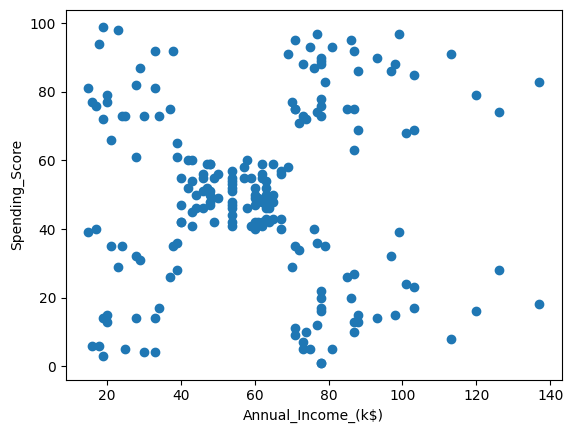

In [107]:
# scatter plot

plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

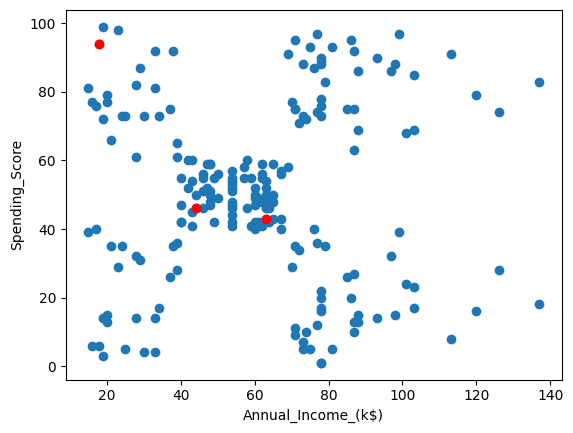

In [108]:
# It is difficult to identify patterns from the above figure, so we apply clustering
# first choose a random n for K
K=3

#get random centroids
centroid = customer_data.sample(n=K) 
plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'])
plt.scatter(centroid['Annual_Income_(k$)'] , centroid['Spending_Score'] , c='red')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [109]:
# The Genre is a categorical feature, 
# so we need to change it to numerical through one-hot encoding

customer_data = pd.get_dummies(customer_data, columns=['Genre'] , drop_first=True)
customer_data.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [133]:
# Identify centroid
# mask has the values of centroid where CustomerID in customer_data is in centroid
mask = customer_data['CustomerID'].isin(centroid.CustomerID.tolist())
print(mask.head())

# Filters data where customer_data is not in mask
X= customer_data[~mask]
X.head()

0    False
1    False
2    False
3    False
4    False
Name: CustomerID, dtype: bool


,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
